## Image classification using MobileNet
In essence, this code creates a model that uses a pre-trained MobileNet network for feature extraction and then adds fully connected layers for classification. The fully connected layer is the part that will be further trained to adapt to the specific data of your classification problem, while the MobileNet layers remain unchanged and are used to extract features from the images. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [2]:
# Create a MobileNet model with an input shape of 224x224 pixels and 3 color channels (RGB).
# The parameter include_top=False means that the fully connected classification layers are not included.
model = MobileNet(input_shape=(224, 224, 3), include_top=False)

# To prevent further training of the MobileNet layers, all layers in the model are set as non-trainable.
for layer in model.layers:
    layer.trainable = False

# Add a Flatten layer to convert the model's output into a one-dimensional vector.
x = Flatten()(model.output)

# Add a Dense layer with 7 units and a 'softmax' activation function for final classification.
x = Dense(units=7, activation='softmax')(x)

# Create a new model that combines the MobileNet architecture with the added layers for classification.
model = Model(model.input, x)


In [3]:
model.compile(optimizer="adam", loss=categorical_crossentropy, metrics=["accuracy"])

# Preparing data for training and testing
This code prepares data for training and testing an image classification model using a pre-trained MobileNet architecture.

Data Augmentation for Training: Training data is augmented with zooming, shearing, horizontal flipping, and pixel value rescaling, enhancing its diversity and quality.

Loading Training Data: The training data is loaded from a specified directory. Images are resized to 224x224 pixels, and batches of 32 images are used.

Data Augmentation for Testing: For testing data, only pixel value rescaling is applied.

Loading Testing Data: Testing data is loaded from the designated directory.

This approach leverages a pre-trained MobileNet network for feature extraction, with additional fully connected layers for classification. The fully connected layers are trained to adapt to the specific classification task, while the MobileNet layers remain unaltered to extract meaningful features from the images.

In [4]:
train_data_augumentation = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, horizontal_flip=True, rescale=1./225)
train_data = train_data_augumentation.flow_from_directory(directory=r"C:\Users\Calin PC\Documents\emotion-detect-project\data\train", target_size=(224,224), batch_size=32)
train_data.class_indices
   

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [5]:
test_data_augumentation = ImageDataGenerator(rescale = 1./225)
test_data = test_data_augumentation.flow_from_directory(directory=r"C:\Users\Calin PC\Documents\emotion-detect-project\data\test", target_size=(224,224), batch_size=32)
test_data.class_indices

Found 7178 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

# Early Stopping and Model Check Point

In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor="val_loss", min_delta=0.01, patience=5, verbose=1)
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
call_back = [es,mc]

In [7]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= test_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\Calin PC\AppData\Local\Temp\ipykernel_316\1036444180.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 19.9954 - accuracy: 0.2219
Epoch 1: val_accuracy improved from -inf to 0.19531, saving model to best_model.h5


c:\Users\Calin PC\Documents\emotion-detect-project\venv\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10/10 [==============================] - 22s 2s/step - loss: 19.9954 - accuracy: 0.2219 - val_loss: 22.5304 - val_accuracy: 0.1953
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 11.8377 - accuracy: 0.2812
Epoch 2: val_accuracy improved from 0.19531 to 0.40234, saving model to best_model.h5
10/10 [==============================] - 28s 3s/step - loss: 11.8377 - accuracy: 0.2812 - val_loss: 7.2190 - val_accuracy: 0.4023
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.7010 - accuracy: 0.4125
Epoch 3: val_accuracy improved from 0.40234 to 0.44141, saving model to best_model.h5
10/10 [==============================] - 28s 3s/step - loss: 6.7010 - accuracy: 0.4125 - val_loss: 4.7690 - val_accuracy: 0.4414
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.1103 - accuracy: 0.3688
Epoch 4: val_accuracy improved from 0.44141 to 0.45703, saving model to best_model.h5
10/10 [==============================] - 30s 3s/step - loss: 6.1103 -

In [8]:
# Loading the best fit model
from keras.models import load_model
model = load_model(r"C:\Users\Calin PC\Documents\emotion-detect-project\.notebooks\best_model.h5")


In [9]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

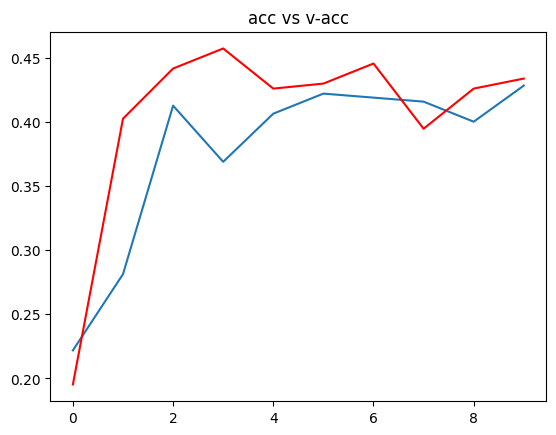

In [10]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

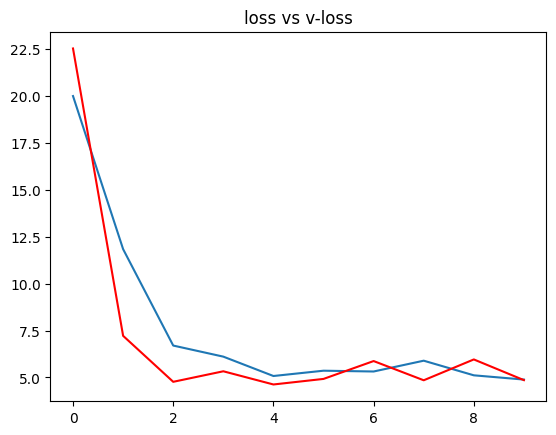

In [11]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [12]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 50ms/step
the image is of happy


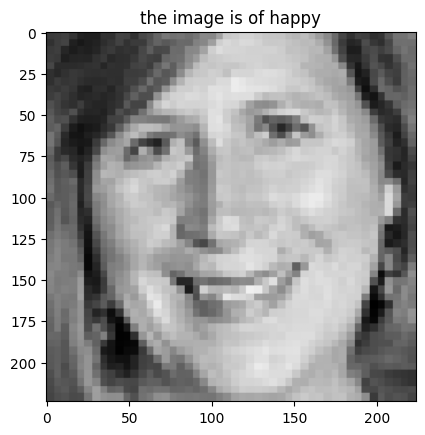

In [25]:
# testing with an image to see if predicts correct the class
path = r"C:\Users\Calin PC\Documents\emotion-detect-project\data\test\happy\PrivateTest_2028370.jpg"
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title(f"the image is of {op[pred]}")
plt.show()

#final
